In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

from keras.models import Sequential
from keras.layers import Dense

from DEN import DENlayer
from DMN import DMNlayer
from DSN import DSNlayer


from PreTrain.HpC import HSpC
from PreTrain.HpC import HEpC
from PreTrain.HpC import HBpC

from PreTrain.kmeans import bkmeans
from PreTrain.kmeans import ekmeans
from PreTrain.kmeans import skmeans



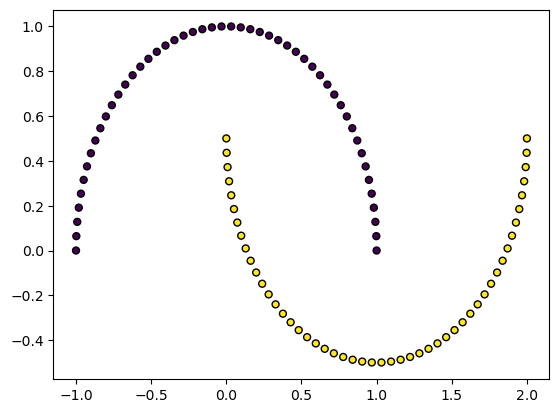

In [2]:
x,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()


In [3]:

unidades=3
hbpc_dendrites  = HBpC.HBpC(x,y,0.0001)
hepc_dendrites  = HEpC.HEpC(x,y)
hspc_dendrites  = HSpC.HSpC(x,y,0.0001)
bkmeans_dendrites  = bkmeans.bkmeans(x,y,[3],0.01)
ekmeans_dendrites  = ekmeans.ekmeans(x,y,[3])
skmeans_dendrites  = skmeans.skmeans(x,y,[2],0.01)



In [4]:

def DEN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DENlayer(n_dendrites, dendrites, activation = "tanh", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model




In [5]:
def DSN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DSNlayer(n_dendrites, dendrites, activation = "tanh", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model



In [6]:
def DMN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DMNlayer(n_dendrites, dendrites, activation = "tanh", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model



In [7]:


model = DMN_Test(10,bkmeans_dendrites)  #DMN_Test()/DEN_Test/DSN_Test
model.summary()
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.05),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dm_nlayer (DMNlayer)         (None, 3)                 12        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


2022-09-14 14:06:08.616405: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 14:06:09.085683: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9266 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1


In [8]:
history = model.fit(x, y,
                     epochs = 250,
                     batch_size = 128)

2022-09-14 14:06:09.610145: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
1/1 [==============================] - 1s 636ms/step - loss: 0.6715 - accuracy: 0.7300
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6497 - accuracy: 0.7400
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6134 - accuracy: 0.7000
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5985 - accuracy: 0.7000
Epoch 6/250
1/1 [==============================] - 0s 5ms/step - loss: 0.5856 - accuracy: 0.7000
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5740 - accuracy: 0.6900
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5633 - accuracy: 0.6900
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 0.5531 - accuracy: 0.7000
Epoch 10/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.6900
Epoch 11/250
1/1 [=========

1/1 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.9600
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1757 - accuracy: 0.9600
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1739 - accuracy: 0.9600
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1722 - accuracy: 0.9600
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1705 - accuracy: 0.9600
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1689 - accuracy: 0.9600
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1673 - accuracy: 0.9600
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9600
Epoch 92/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1642 - accuracy: 0.9700
Epoch 93/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1627 - accuracy: 0.9700
Epoch 94/250
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.0967 - accuracy: 0.9900
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0962 - accuracy: 0.9900
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9900
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0951 - accuracy: 0.9900
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0945 - accuracy: 0.9900
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0941 - accuracy: 0.9900
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9900
Epoch 174/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0930 - accuracy: 0.9900
Epoch 175/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0927 - accuracy: 0.9900
Epoch 176/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0920 - accuracy: 0.9900
Epoch 177/250
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0661 - accuracy: 0.9900
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0658 - accuracy: 0.9900


Text(0, 0.5, 'x2')

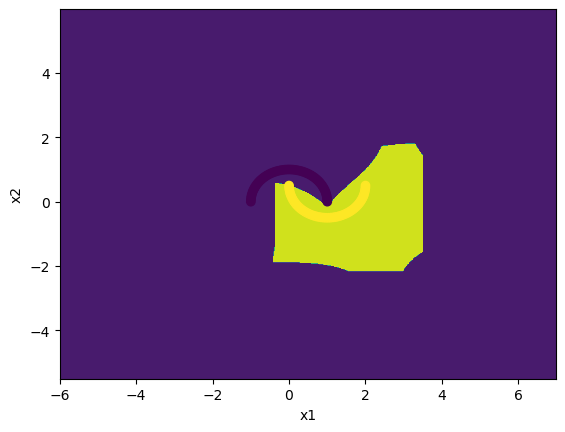

In [10]:
# Decision Boundary
h = 0.02
scale = 5
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')